In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-2737.2300)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 18335.90895  validloss 6098.82032±0.00000  bestvalidloss 6098.82032  last_update 0
train: iter 1  trainloss 1117.91817  validloss 1145.16592±0.00000  bestvalidloss 1145.16592  last_update 0
train: iter 2  trainloss 923.32555  validloss 930.32752±0.00000  bestvalidloss 930.32752  last_update 0
train: iter 3  trainloss 894.40961  validloss 949.25763±0.00000  bestvalidloss 930.32752  last_update 1
train: iter 4  trainloss 839.34675  validloss 986.85049±0.00000  bestvalidloss 930.32752  last_update 2
train: iter 5  trainloss 804.05712  validloss 901.29377±0.00000  bestvalidloss 901.29377  last_update 0
train: iter 6  trainloss 773.80511  validloss 843.16758±0.00000  bestvalidloss 843.16758  last_update 0
train: iter 7  trainloss 728.81887  validloss 838.78502±0.00000  bestvalidloss 838.78502  last_update 0
train: iter 8  trainloss 678.30039  validloss 772.33170±0.00000  bestvalidloss 772.33170  last_update 0
train: iter 9  trainloss 607.65664  va

train: iter 77  trainloss -770.80036  validloss -585.41184±0.00000  bestvalidloss -639.05440  last_update 8
train: iter 78  trainloss -738.80069  validloss -653.66158±0.00000  bestvalidloss -653.66158  last_update 0
train: iter 79  trainloss -821.87520  validloss -601.99893±0.00000  bestvalidloss -653.66158  last_update 1
train: iter 80  trainloss -786.82022  validloss -584.83533±0.00000  bestvalidloss -653.66158  last_update 2
train: iter 81  trainloss -753.40032  validloss -644.91355±0.00000  bestvalidloss -653.66158  last_update 3
train: iter 82  trainloss -822.58860  validloss -637.88735±0.00000  bestvalidloss -653.66158  last_update 4
train: iter 83  trainloss -811.17284  validloss -701.46349±0.00000  bestvalidloss -701.46349  last_update 0
train: iter 84  trainloss -751.47192  validloss -585.22149±0.00000  bestvalidloss -701.46349  last_update 1
train: iter 85  trainloss -822.14623  validloss -592.72848±0.00000  bestvalidloss -701.46349  last_update 2
train: iter 86  trainloss -7

train: iter 153  trainloss -953.91687  validloss -742.22755±0.00000  bestvalidloss -926.55239  last_update 5
train: iter 154  trainloss -977.07401  validloss -733.00653±0.00000  bestvalidloss -926.55239  last_update 6
train: iter 155  trainloss -932.36313  validloss -825.90083±0.00000  bestvalidloss -926.55239  last_update 7
train: iter 156  trainloss -1052.75604  validloss -838.71129±0.00000  bestvalidloss -926.55239  last_update 8
train: iter 157  trainloss -1063.90838  validloss -863.19850±0.00000  bestvalidloss -926.55239  last_update 9
train: iter 158  trainloss -713.80251  validloss -18.43032±0.00000  bestvalidloss -926.55239  last_update 10
train: iter 159  trainloss -890.40109  validloss -676.63495±0.00000  bestvalidloss -926.55239  last_update 11
train: iter 160  trainloss -838.51862  validloss -347.95625±0.00000  bestvalidloss -926.55239  last_update 12
train: iter 161  trainloss -1107.80129  validloss -924.61989±0.00000  bestvalidloss -926.55239  last_update 13
train: iter 1

train: iter 227  trainloss -1296.48112  validloss -1024.34429±0.00000  bestvalidloss -1122.08381  last_update 18
train: iter 228  trainloss -1269.53736  validloss -947.70833±0.00000  bestvalidloss -1122.08381  last_update 19
train: iter 229  trainloss -1316.95841  validloss -1078.35880±0.00000  bestvalidloss -1122.08381  last_update 20
train: iter 230  trainloss -1250.74767  validloss -1030.08771±0.00000  bestvalidloss -1122.08381  last_update 21
train: iter 231  trainloss -1277.27242  validloss -1100.69859±0.00000  bestvalidloss -1122.08381  last_update 22
train: iter 232  trainloss -1298.77540  validloss -1069.36548±0.00000  bestvalidloss -1122.08381  last_update 23
train: iter 233  trainloss -1361.07208  validloss -1136.05802±0.00000  bestvalidloss -1136.05802  last_update 0
train: iter 234  trainloss -1267.44320  validloss -1142.78221±0.00000  bestvalidloss -1142.78221  last_update 0
train: iter 235  trainloss -1334.30735  validloss -1124.49611±0.00000  bestvalidloss -1142.78221  l

train: iter 300  trainloss -1442.00912  validloss -1190.23796±0.00000  bestvalidloss -1288.41770  last_update 17
train: iter 301  trainloss -1423.00014  validloss -1167.70982±0.00000  bestvalidloss -1288.41770  last_update 18
train: iter 302  trainloss -1285.02872  validloss -1246.34969±0.00000  bestvalidloss -1288.41770  last_update 19
train: iter 303  trainloss -1283.62564  validloss -851.38494±0.00000  bestvalidloss -1288.41770  last_update 20
train: iter 304  trainloss -1355.01803  validloss -1051.30632±0.00000  bestvalidloss -1288.41770  last_update 21
train: iter 305  trainloss -1463.10083  validloss -1195.77146±0.00000  bestvalidloss -1288.41770  last_update 22
train: iter 306  trainloss -1424.01461  validloss -1221.46405±0.00000  bestvalidloss -1288.41770  last_update 23
train: iter 307  trainloss -1409.26415  validloss -1122.87101±0.00000  bestvalidloss -1288.41770  last_update 24
train: iter 308  trainloss -1459.95006  validloss -1230.96457±0.00000  bestvalidloss -1288.41770 

train: iter 373  trainloss -1269.47151  validloss -1073.38368±0.00000  bestvalidloss -1333.75637  last_update 3
train: iter 374  trainloss -1489.84163  validloss -1140.53866±0.00000  bestvalidloss -1333.75637  last_update 4
train: iter 375  trainloss -1542.18878  validloss -1306.04465±0.00000  bestvalidloss -1333.75637  last_update 5
train: iter 376  trainloss -1446.53302  validloss -1210.23394±0.00000  bestvalidloss -1333.75637  last_update 6
train: iter 377  trainloss -1543.44825  validloss -1359.89443±0.00000  bestvalidloss -1359.89443  last_update 0
train: iter 378  trainloss -1537.63310  validloss -1247.72172±0.00000  bestvalidloss -1359.89443  last_update 1
train: iter 379  trainloss -1558.78052  validloss -1335.27174±0.00000  bestvalidloss -1359.89443  last_update 2
train: iter 380  trainloss -1401.86159  validloss -1327.84338±0.00000  bestvalidloss -1359.89443  last_update 3
train: iter 381  trainloss -1508.41298  validloss -1159.87173±0.00000  bestvalidloss -1359.89443  last_u

train: iter 446  trainloss -1592.11868  validloss -1410.13701±0.00000  bestvalidloss -1440.37751  last_update 33
train: iter 447  trainloss -1597.26639  validloss -1409.24474±0.00000  bestvalidloss -1440.37751  last_update 34
train: iter 448  trainloss -1605.94211  validloss -1431.85276±0.00000  bestvalidloss -1440.37751  last_update 35
train: iter 449  trainloss -1551.72559  validloss -1391.96143±0.00000  bestvalidloss -1440.37751  last_update 36
train: iter 450  trainloss -1551.12946  validloss -1415.23855±0.00000  bestvalidloss -1440.37751  last_update 37
train: iter 451  trainloss -1538.07105  validloss -1270.25734±0.00000  bestvalidloss -1440.37751  last_update 38
train: iter 452  trainloss -1569.70085  validloss -1454.53631±0.00000  bestvalidloss -1454.53631  last_update 0
train: iter 453  trainloss -1465.97167  validloss -1228.07606±0.00000  bestvalidloss -1454.53631  last_update 1
train: iter 454  trainloss -1574.81635  validloss -1399.58372±0.00000  bestvalidloss -1454.53631  

train: iter 519  trainloss -1596.56709  validloss -1411.49977±0.00000  bestvalidloss -1485.12727  last_update 4
train: iter 520  trainloss -1412.20833  validloss -1464.70718±0.00000  bestvalidloss -1485.12727  last_update 5
train: iter 521  trainloss -1439.37812  validloss -1035.91108±0.00000  bestvalidloss -1485.12727  last_update 6
train: iter 522  trainloss -1562.14732  validloss -1410.78038±0.00000  bestvalidloss -1485.12727  last_update 7
train: iter 523  trainloss -1588.90753  validloss -1450.84888±0.00000  bestvalidloss -1485.12727  last_update 8
train: iter 524  trainloss -1573.08417  validloss -1422.15283±0.00000  bestvalidloss -1485.12727  last_update 9
train: iter 525  trainloss -1474.23957  validloss -1393.37055±0.00000  bestvalidloss -1485.12727  last_update 10
train: iter 526  trainloss -1534.96278  validloss -1274.29145±0.00000  bestvalidloss -1485.12727  last_update 11
train: iter 527  trainloss -1563.66910  validloss -1403.44544±0.00000  bestvalidloss -1485.12727  last

train: iter 593  trainloss -1578.08712  validloss -1443.10386±0.00000  bestvalidloss -1500.50258  last_update 29
train: iter 594  trainloss -1609.16714  validloss -1389.41810±0.00000  bestvalidloss -1500.50258  last_update 30
train: iter 595  trainloss -1528.18994  validloss -1454.38941±0.00000  bestvalidloss -1500.50258  last_update 31
train: iter 596  trainloss -1589.86261  validloss -1370.80759±0.00000  bestvalidloss -1500.50258  last_update 32
train: iter 597  trainloss -1594.34359  validloss -1464.27632±0.00000  bestvalidloss -1500.50258  last_update 33
train: iter 598  trainloss -1569.30011  validloss -1378.45355±0.00000  bestvalidloss -1500.50258  last_update 34
train: iter 599  trainloss -1432.74319  validloss -1173.71159±0.00000  bestvalidloss -1500.50258  last_update 35
train: iter 600  trainloss -1484.92867  validloss -1339.62338±0.00000  bestvalidloss -1500.50258  last_update 36
train: iter 601  trainloss -1609.07417  validloss -1390.84596±0.00000  bestvalidloss -1500.50258

train: iter 667  trainloss -1639.66844  validloss -1504.06580±0.00000  bestvalidloss -1515.09560  last_update 64
train: iter 668  trainloss -1598.58100  validloss -1473.63424±0.00000  bestvalidloss -1515.09560  last_update 65
train: iter 669  trainloss -1482.23287  validloss -1472.22359±0.00000  bestvalidloss -1515.09560  last_update 66
train: iter 670  trainloss -1588.43055  validloss -1292.84912±0.00000  bestvalidloss -1515.09560  last_update 67
train: iter 671  trainloss -1591.40961  validloss -1490.90849±0.00000  bestvalidloss -1515.09560  last_update 68
train: iter 672  trainloss -1624.15519  validloss -1449.25348±0.00000  bestvalidloss -1515.09560  last_update 69
train: iter 673  trainloss -1618.40311  validloss -1486.99698±0.00000  bestvalidloss -1515.09560  last_update 70
train: iter 674  trainloss -1125.30806  validloss -1328.28342±0.00000  bestvalidloss -1515.09560  last_update 71
train: iter 675  trainloss -1461.12941  validloss -1140.60222±0.00000  bestvalidloss -1515.09560

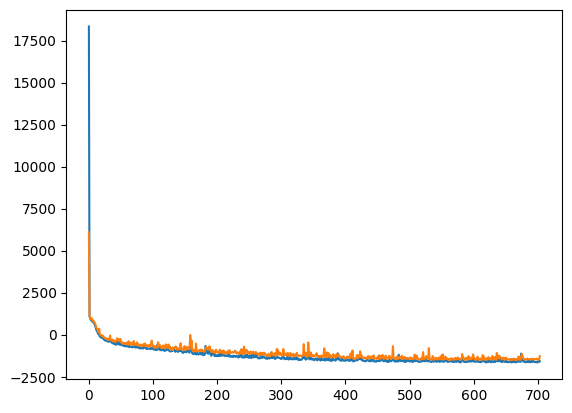

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.97529  validloss 10.42593±0.00000  bestvalidloss 10.42593  last_update 0
train: iter 1  trainloss 9.09046  validloss 9.47284±0.00000  bestvalidloss 9.47284  last_update 0
train: iter 2  trainloss 8.35362  validloss 8.66775±0.00000  bestvalidloss 8.66775  last_update 0
train: iter 3  trainloss 7.72152  validloss 8.01388±0.00000  bestvalidloss 8.01388  last_update 0
train: iter 4  trainloss 7.20743  validloss 7.44040±0.00000  bestvalidloss 7.44040  last_update 0
train: iter 5  trainloss 6.75935  validloss 6.95669±0.00000  bestvalidloss 6.95669  last_update 0
train: iter 6  trainloss 6.36997  validloss 6.54823±0.00000  bestvalidloss 6.54823  last_update 0
train: iter 7  trainloss 6.04092  validloss 6.19007±0.00000  bestvalidloss 6.19007  last_update 0
train: iter 8  trainloss 5.74892  validloss 5.86319±0.00000  bestvalidloss 5.86319  last_update 0
train: iter 9  trainloss 5.49032  validloss 5.59191±0.00000  bestvalidloss 5.59191  last_update 0
train: iter 10  tr

train: iter 84  trainloss -0.50654  validloss -0.41439±0.00000  bestvalidloss -0.44165  last_update 2
train: iter 85  trainloss -0.51581  validloss -0.44145±0.00000  bestvalidloss -0.44165  last_update 3
train: iter 86  trainloss -0.58248  validloss -0.50046±0.00000  bestvalidloss -0.50046  last_update 0
train: iter 87  trainloss -0.63191  validloss -0.57823±0.00000  bestvalidloss -0.57823  last_update 0
train: iter 88  trainloss -0.68527  validloss -0.61127±0.00000  bestvalidloss -0.61127  last_update 0
train: iter 89  trainloss -0.71272  validloss -0.59655±0.00000  bestvalidloss -0.61127  last_update 1
train: iter 90  trainloss -0.75142  validloss -0.66610±0.00000  bestvalidloss -0.66610  last_update 0
train: iter 91  trainloss -0.82262  validloss -0.69554±0.00000  bestvalidloss -0.69554  last_update 0
train: iter 92  trainloss -0.81099  validloss -0.70889±0.00000  bestvalidloss -0.70889  last_update 0
train: iter 93  trainloss -0.83801  validloss -0.81650±0.00000  bestvalidloss -0.8

train: iter 169  trainloss -2.55291  validloss -2.59579±0.00000  bestvalidloss -2.64310  last_update 16
train: iter 170  trainloss -2.38132  validloss -2.48341±0.00000  bestvalidloss -2.64310  last_update 17
train: iter 171  trainloss -2.38702  validloss -2.44183±0.00000  bestvalidloss -2.64310  last_update 18
train: iter 172  trainloss -2.46243  validloss -2.58174±0.00000  bestvalidloss -2.64310  last_update 19
train: iter 173  trainloss -2.51119  validloss -2.56543±0.00000  bestvalidloss -2.64310  last_update 20
train: iter 174  trainloss -2.45571  validloss -2.61042±0.00000  bestvalidloss -2.64310  last_update 21
train: iter 175  trainloss -2.37173  validloss -2.48575±0.00000  bestvalidloss -2.64310  last_update 22
train: iter 176  trainloss -2.46115  validloss -2.44987±0.00000  bestvalidloss -2.64310  last_update 23
train: iter 177  trainloss -2.32503  validloss -2.56827±0.00000  bestvalidloss -2.64310  last_update 24
train: iter 178  trainloss -2.36461  validloss -2.51339±0.00000 

train: iter 256  trainloss -2.48015  validloss -2.64859±0.00000  bestvalidloss -2.80628  last_update 48
train: iter 257  trainloss -2.49608  validloss -2.59843±0.00000  bestvalidloss -2.80628  last_update 49
train: iter 258  trainloss -2.44200  validloss -2.64005±0.00000  bestvalidloss -2.80628  last_update 50
train: iter 259  trainloss -2.43024  validloss -2.47276±0.00000  bestvalidloss -2.80628  last_update 51
train: iter 260  trainloss -2.56155  validloss -2.58301±0.00000  bestvalidloss -2.80628  last_update 52
train: iter 261  trainloss -2.50564  validloss -2.76206±0.00000  bestvalidloss -2.80628  last_update 53
train: iter 262  trainloss -2.46774  validloss -2.62837±0.00000  bestvalidloss -2.80628  last_update 54
train: iter 263  trainloss -2.34740  validloss -2.52131±0.00000  bestvalidloss -2.80628  last_update 55
train: iter 264  trainloss -2.42126  validloss -2.47820±0.00000  bestvalidloss -2.80628  last_update 56
train: iter 265  trainloss -2.45821  validloss -2.47169±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.9457, -3.6640, -4.2309, -6.2975], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 68.06580  validloss 67.36280±0.00000  bestvalidloss 67.36280  last_update 0
train: iter 1  trainloss 49.16519  validloss 51.77969±0.00000  bestvalidloss 51.77969  last_update 0
train: iter 2  trainloss 34.38987  validloss 35.31631±0.00000  bestvalidloss 35.31631  last_update 0
train: iter 3  trainloss 26.02648  validloss 25.85530±0.00000  bestvalidloss 25.85530  last_update 0
train: iter 4  trainloss 20.65360  validloss 20.43178±0.00000  bestvalidloss 20.43178  last_update 0
train: iter 5  trainloss 16.93972  validloss 16.78669±0.00000  bestvalidloss 16.78669  last_update 0
train: iter 6  trainloss 14.09970  validloss 14.43346±0.00000  bestvalidloss 14.43346  last_update 0
train: iter 7  trainloss 12.09520  validloss 12.89241±0.00000  bestvalidloss 12.89241  last_update 0
train: iter 8  trainloss 10.56228  validloss 11.43997±0.00000  bestvalidloss 11.43997  last_update 0
train: iter 9  trainloss 9.30385  validloss 10.83094±0.00000  bestvalidloss 10.83094  last_

train: iter 85  trainloss 3.44353  validloss 6.14008±0.00000  bestvalidloss 6.14008  last_update 0
train: iter 86  trainloss 3.44640  validloss 6.26797±0.00000  bestvalidloss 6.14008  last_update 1
train: iter 87  trainloss 3.43927  validloss 6.45090±0.00000  bestvalidloss 6.14008  last_update 2
train: iter 88  trainloss 3.50243  validloss 6.26738±0.00000  bestvalidloss 6.14008  last_update 3
train: iter 89  trainloss 3.41625  validloss 6.25725±0.00000  bestvalidloss 6.14008  last_update 4
train: iter 90  trainloss 3.41281  validloss 6.07153±0.00000  bestvalidloss 6.07153  last_update 0
train: iter 91  trainloss 3.41116  validloss 6.04572±0.00000  bestvalidloss 6.04572  last_update 0
train: iter 92  trainloss 3.41268  validloss 6.47409±0.00000  bestvalidloss 6.04572  last_update 1
train: iter 93  trainloss 3.41940  validloss 6.42040±0.00000  bestvalidloss 6.04572  last_update 2
train: iter 94  trainloss 3.42482  validloss 6.10260±0.00000  bestvalidloss 6.04572  last_update 3
train: ite

train: iter 168  trainloss 3.31362  validloss 6.20454±0.00000  bestvalidloss 5.95368  last_update 56
train: iter 169  trainloss 3.27434  validloss 6.08960±0.00000  bestvalidloss 5.95368  last_update 57
train: iter 170  trainloss 3.29102  validloss 6.29493±0.00000  bestvalidloss 5.95368  last_update 58
train: iter 171  trainloss 3.29717  validloss 6.37238±0.00000  bestvalidloss 5.95368  last_update 59
train: iter 172  trainloss 3.29090  validloss 6.13805±0.00000  bestvalidloss 5.95368  last_update 60
train: iter 173  trainloss 3.31677  validloss 6.41497±0.00000  bestvalidloss 5.95368  last_update 61
train: iter 174  trainloss 3.27935  validloss 6.25108±0.00000  bestvalidloss 5.95368  last_update 62
train: iter 175  trainloss 3.33704  validloss 6.20564±0.00000  bestvalidloss 5.95368  last_update 63
train: iter 176  trainloss 3.28256  validloss 6.02597±0.00000  bestvalidloss 5.95368  last_update 64
train: iter 177  trainloss 3.28037  validloss 6.14675±0.00000  bestvalidloss 5.95368  last_

train: iter 252  trainloss 3.19348  validloss 6.20625±0.00000  bestvalidloss 5.91367  last_update 14
train: iter 253  trainloss 3.19390  validloss 6.25748±0.00000  bestvalidloss 5.91367  last_update 15
train: iter 254  trainloss 3.21084  validloss 6.48118±0.00000  bestvalidloss 5.91367  last_update 16
train: iter 255  trainloss 3.17456  validloss 6.58752±0.00000  bestvalidloss 5.91367  last_update 17
train: iter 256  trainloss 3.17941  validloss 5.96665±0.00000  bestvalidloss 5.91367  last_update 18
train: iter 257  trainloss 3.20711  validloss 6.22700±0.00000  bestvalidloss 5.91367  last_update 19
train: iter 258  trainloss 3.21279  validloss 6.02383±0.00000  bestvalidloss 5.91367  last_update 20
train: iter 259  trainloss 3.19800  validloss 6.13830±0.00000  bestvalidloss 5.91367  last_update 21
train: iter 260  trainloss 3.22828  validloss 5.91483±0.00000  bestvalidloss 5.91367  last_update 22
train: iter 261  trainloss 3.17829  validloss 6.23545±0.00000  bestvalidloss 5.91367  last_

train: iter 334  trainloss 3.13823  validloss 6.22618±0.00000  bestvalidloss 5.91367  last_update 96
train: iter 335  trainloss 3.15488  validloss 6.20005±0.00000  bestvalidloss 5.91367  last_update 97
train: iter 336  trainloss 3.13003  validloss 6.09559±0.00000  bestvalidloss 5.91367  last_update 98
train: iter 337  trainloss 3.09575  validloss 6.43559±0.00000  bestvalidloss 5.91367  last_update 99
train: iter 338  trainloss 3.15402  validloss 6.14495±0.00000  bestvalidloss 5.91367  last_update 100
train: fin


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-16.1381)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(6.1439)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.3160754712957883
tensor([2.6833])
